LIBS

In [71]:
import pandas as pd

DATA

In [72]:
url = 'https://raw.githubusercontent.com/alura-cursos/credit_scoring/main/base_dados_traduzida.csv'
data = pd.read_csv(url)
data

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,no checking account,12,existing credits paid back duly till now,radio/television,1736,... < 100 DM,4 <= ... < 7 years,3,female : divorced/separated/married,...,4,real estate,31,none,own,1,unskilled - resident,1,none,yes
996,0,< 0 DM,30,existing credits paid back duly till now,car (used),3857,... < 100 DM,1 <= ... < 4 years,4,male : divorced/separated,...,4,if not A121 : building society savings agreeme...,40,none,own,1,management/ self-employed/ highly qualified em...,1,"yes, registered under the customers name",yes
997,0,no checking account,12,existing credits paid back duly till now,domestic appliances,804,... < 100 DM,.. >= 7 years,4,male : single,...,4,"if not A121/A122 : car or other, not in attrib...",38,none,own,1,skilled employee / official,1,none,yes
998,1,< 0 DM,45,existing credits paid back duly till now,domestic appliances,1845,... < 100 DM,1 <= ... < 4 years,4,male : single,...,4,unknown / no property,23,none,for free,1,skilled employee / official,1,"yes, registered under the customers name",yes


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   default                      1000 non-null   int64 
 1   conta_corrente               1000 non-null   object
 2   prazo_emprestimo_meses       1000 non-null   int64 
 3   historico_credito            1000 non-null   object
 4   proposito_emprestimo         1000 non-null   object
 5   valor_emprestimo             1000 non-null   int64 
 6   reserva_cc                   1000 non-null   object
 7   tempo_emprego_atual          1000 non-null   object
 8   taxa_comp_salario            1000 non-null   int64 
 9   sexo_est_civil               1000 non-null   object
 10  outros_fiadores              1000 non-null   object
 11  anos_residencia_atual        1000 non-null   int64 
 12  propriedade                  1000 non-null   object
 13  idade                        1000 

BASE DESBALANCEADA

In [74]:
data['default'].value_counts()

default
0    700
1    300
Name: count, dtype: int64

In [75]:
data.duplicated().sum()

0

TRATAR DADOS

NAO CONSIDERAR SEXO POIS É UMA INFORMAÇÃO SENSIVEL NO BRASIL

In [76]:
est_civil = []
for current_info in data['sexo_est_civil']:
    est_civil.append(current_info[current_info.index(':')+1:].strip() == 'single')
est_civil
data['est_civil'] = [1 if x else 0 for x in est_civil]
data['est_civil']

0      1
1      0
2      1
3      1
4      1
      ..
995    0
996    0
997    1
998    1
999    1
Name: est_civil, Length: 1000, dtype: int64

In [77]:
def map_strings(data, column_name):
    unique = data[column_name].unique()
    a = {}
    for i, un in enumerate(unique):
        a[un] = i

    data[column_name] = data[column_name].map(a)
    return data

In [78]:
colunas_string = data.select_dtypes(include=['object']).columns.tolist()
for column in colunas_string:
    data = map_strings(data, column)

In [79]:
data.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,est_civil
0,0,0,6,0,0,1169,0,0,4,0,...,0,67,0,0,2,0,1,0,0,1
1,1,1,48,1,0,5951,1,1,2,1,...,0,22,0,0,1,0,1,1,0,0
2,0,2,12,0,1,2096,1,2,2,0,...,0,49,0,0,1,1,2,1,0,1
3,0,0,42,1,2,7882,1,2,2,0,...,1,45,0,1,1,0,2,1,0,1
4,1,0,24,2,3,4870,1,1,3,0,...,2,53,0,1,2,0,2,1,0,1


FAIXAS DE DADOS

In [80]:
data['idade'] = pd.cut(
    data['idade'],
    bins=[18, 30, 40, 50, 60, 70, 80],
    labels=[1,2,3,4,5,6]
)
data['idade']

0      5
1      1
2      3
3      3
4      4
      ..
995    2
996    2
997    2
998    1
999    1
Name: idade, Length: 1000, dtype: category
Categories (6, int64): [1 < 2 < 3 < 4 < 5 < 6]

In [81]:
data['prazo_emprestimo_meses'] = pd.cut(
    data['prazo_emprestimo_meses'],
    bins=[1, 12, 24, 26, 48, 72],
    labels=[1,2,3,4,5]
)
data['prazo_emprestimo_meses']

0      1
1      4
2      1
3      4
4      2
      ..
995    1
996    4
997    1
998    4
999    4
Name: prazo_emprestimo_meses, Length: 1000, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [82]:
nums = list(range(0, 21))
multiplied_nums = [num * 1000 for num in nums]
data['valor_emprestimo'] = pd.cut(
    data['valor_emprestimo'],
    bins=multiplied_nums,
    labels=nums[:-1]
)
data['valor_emprestimo']

0      1
1      5
2      2
3      7
4      4
      ..
995    1
996    3
997    0
998    1
999    4
Name: valor_emprestimo, Length: 1000, dtype: category
Categories (20, int64): [0 < 1 < 2 < 3 ... 16 < 17 < 18 < 19]

In [83]:
data

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,est_civil
0,0,0,1,0,0,1,0,0,4,0,...,0,5,0,0,2,0,1,0,0,1
1,1,1,4,1,0,5,1,1,2,1,...,0,1,0,0,1,0,1,1,0,0
2,0,2,1,0,1,2,1,2,2,0,...,0,3,0,0,1,1,2,1,0,1
3,0,0,4,1,2,7,1,2,2,0,...,1,3,0,1,1,0,2,1,0,1
4,1,0,2,2,3,4,1,1,3,0,...,2,4,0,1,2,0,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,2,1,1,2,1,1,2,3,1,...,0,2,0,0,1,1,1,1,0,0
996,0,0,4,1,4,3,1,1,4,2,...,1,2,0,0,1,2,1,0,0,0
997,0,2,1,1,0,0,1,0,4,0,...,3,2,0,0,1,0,1,1,0,1
998,1,0,4,1,0,1,1,1,4,0,...,2,1,0,1,1,0,1,0,0,1


MOSTRAR DADOS

In [84]:
import matplotlib.pyplot as plt 
import seaborn as sns

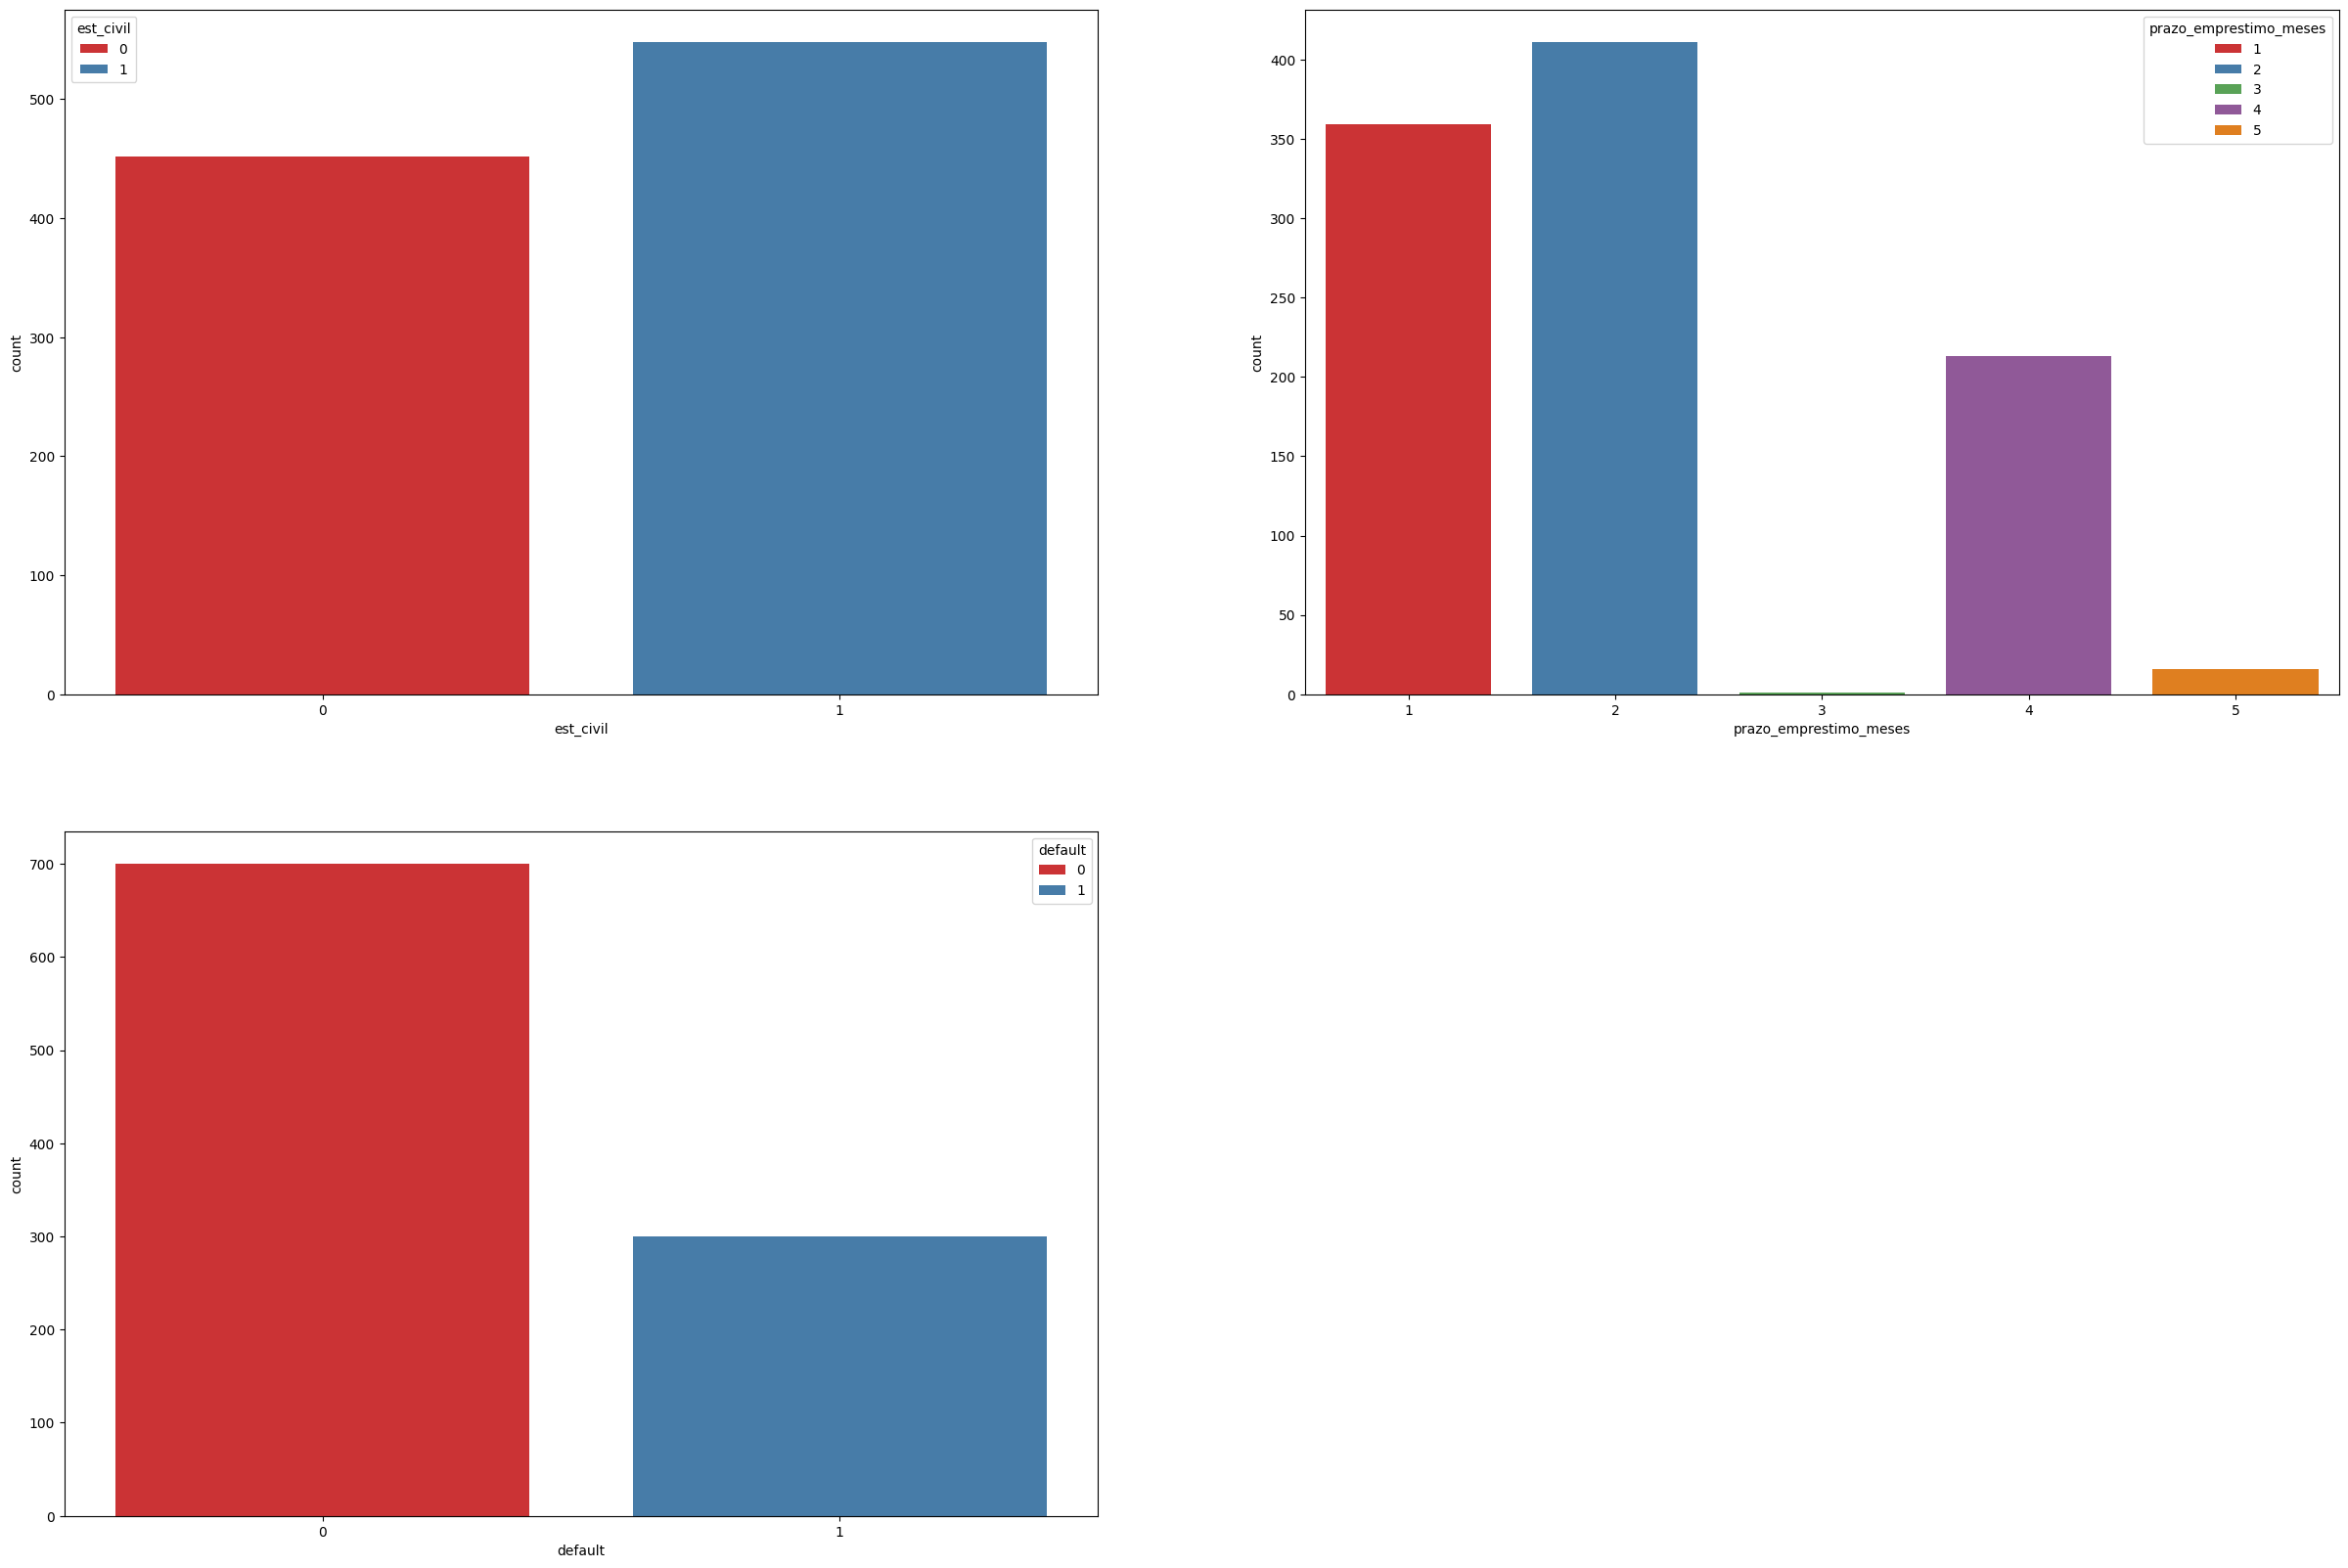

In [85]:
hist = ['est_civil', 'prazo_emprestimo_meses', 'default']
lista_histogramas = list(enumerate(hist))
plt.figure(figsize=(30,20))
for i in lista_histogramas:
    plt.subplot(2,2, i[0]+1)
    sns.countplot(
        x=i[1],
        data=data,
        palette="Set1",
        hue=i[1]
    )

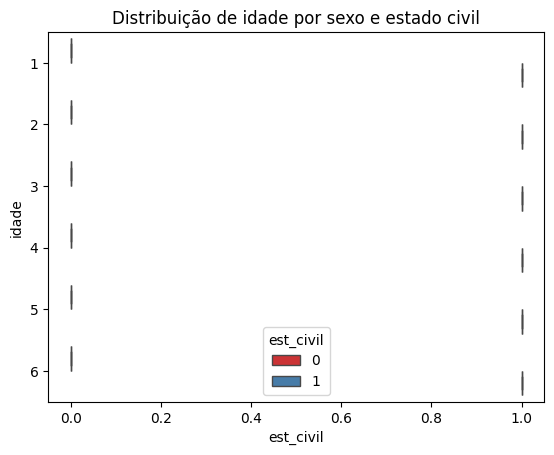

In [86]:
sns.boxplot(
    x='est_civil',
    y='idade',
    data=data,
    palette='Set1',
    hue='est_civil'
    )
plt.title('Distribuição de idade por sexo e estado civil')
plt.show()

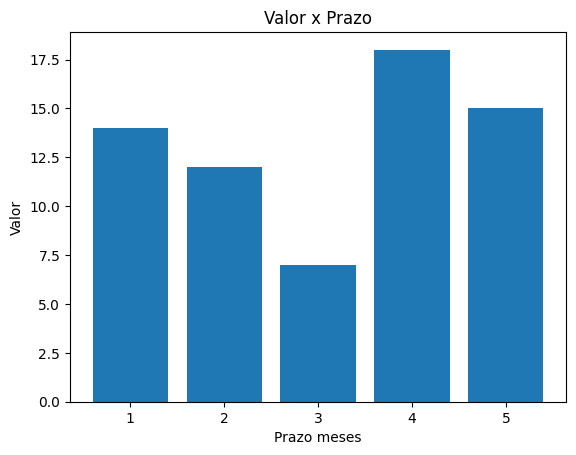

In [87]:
plt.bar(
    data['prazo_emprestimo_meses'], data['valor_emprestimo'],
)
plt.xlabel('Prazo meses')
plt.ylabel('Valor')
plt.title('Valor x Prazo')
plt.show()


TREINO E TESTE

In [88]:
x = data.drop(columns=['default', 'sexo_est_civil'])
y = data['default']

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
x_train,x_test, y_train, y_test = train_test_split(
    x, 
    y,
    # stratify=y,
    random_state=77,
    test_size=0.2,
    )

REGRESSAO LOGISTICA

In [91]:
from sklearn.linear_model import LogisticRegression

In [92]:
model = LogisticRegression(max_iter=10000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

SCORE

In [93]:
score = model.score(x_test, y_test)
score

0.81

MATRIZ DE CONFUSAO

In [94]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay 

In [95]:
cm = confusion_matrix(y_test, model.predict(x_test))

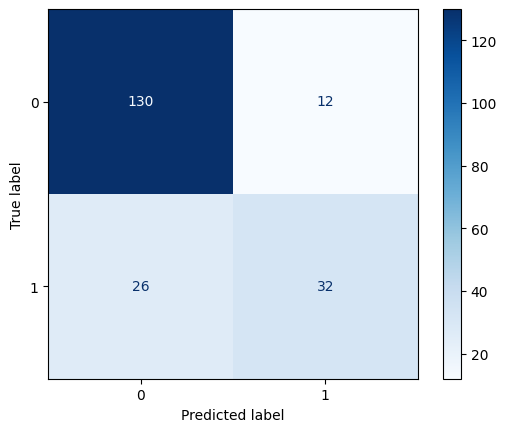

In [96]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

CLASSIFICATION REPORT

In [97]:
from sklearn.metrics import classification_report

In [98]:
predict = model.predict(x_test)
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       142
           1       0.73      0.55      0.63        58

    accuracy                           0.81       200
   macro avg       0.78      0.73      0.75       200
weighted avg       0.80      0.81      0.80       200



ROC

QUANTO MAIS PERTO DA LINHA VERDE MELHOR

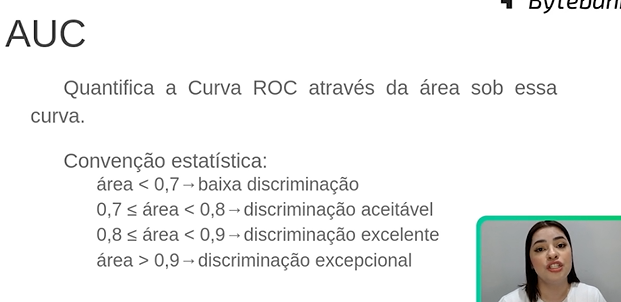

In [99]:
from sklearn.metrics import roc_curve, roc_auc_score

In [100]:
prob = model.predict_proba(x_test)

tfp, tvp, limite = roc_curve(y_test, prob[:,1])

auc = roc_auc_score(y_test, prob[:,1])

auc

0.8058523555123847

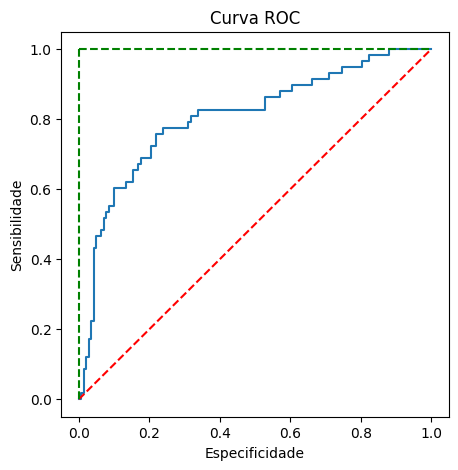

In [101]:
plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC')
plt.plot(tfp, tvp)
plt.xlabel('Especificidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red') #plotando linha guia pontilhada vermelha
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green') #plotando linha guia pontilhada verde
plt.show()

ANALISE DESCRITIVA

In [102]:
data.describe()

,default,conta_corrente,historico_credito,proposito_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,outros_fiadores,anos_residencia_atual,propriedade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,est_civil
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.300000,1.246000,1.022000,2.414000,1.285000,1.561000,2.973000,0.686000,0.134000,2.845000,1.536000,0.233000,0.466000,1.407000,0.562000,1.155000,0.596000,0.037000,0.54800
std,0.458487,0.927547,0.991211,2.033898,1.133605,1.382096,1.118715,0.931811,0.445244,1.103718,1.215805,0.522479,0.779392,0.577654,0.821481,0.362086,0.490943,0.188856,0.49794
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000
50%,0.000000,1.000000,1.000000,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.00000
75%,1.000000,2.000000,1.000000,4.000000,1.000000,2.000000,4.000000,1.000000,0.000000,4.000000,3.000000,0.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,1.00000
max,1.000000,3.000000,4.000000,9.000000,4.000000,4.000000,4.000000,3.000000,2.000000,4.000000,3.000000,2.000000,2.000000,4.000000,3.000000,2.000000,1.000000,1.000000,1.00000


VARIOS MODELOS

In [103]:
def roda_modelo(x_train, x_test, y_train, y_test, classificador):
    #treino
    model = classificador
    model.fit(x_train, y_train)

    #classification report
    predict = model.predict(x_test)
    print(classification_report(y_test, predict))

    #matriz confusao
    cm = confusion_matrix(y_test, model.predict(x_test))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.show()

    #curva ROC
    prob = model.predict_proba(x_test)
    tfp, tvp, limite = roc_curve(y_test, prob[:,1])
    auc = roc_auc_score(y_test, prob[:,1])

    plt.subplots(1, figsize=(5,5))
    plt.title('Curva ROC')
    plt.plot(tfp, tvp)
    plt.xlabel('Especificidade')
    plt.ylabel('Sensibilidade')
    plt.plot([0, 1], ls="--", c = 'red') #plotando linha guia pontilhada vermelha
    plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green') #plotando linha guia pontilhada verde
    plt.show()

    return model

In [104]:
x = data.drop(columns=['default', 'sexo_est_civil'])
y = data['default']
x_train, x_test, y_train, y_test = train_test_split(
    x, 
    y,
    # stratify=y,
    random_state=77,
    test_size=0.2,
    )

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       142
           1       0.73      0.55      0.63        58

    accuracy                           0.81       200
   macro avg       0.78      0.73      0.75       200
weighted avg       0.80      0.81      0.80       200



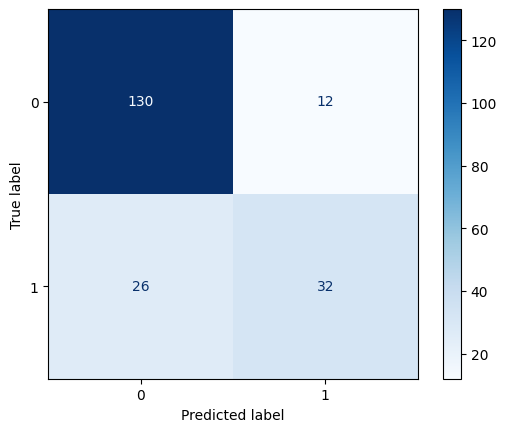

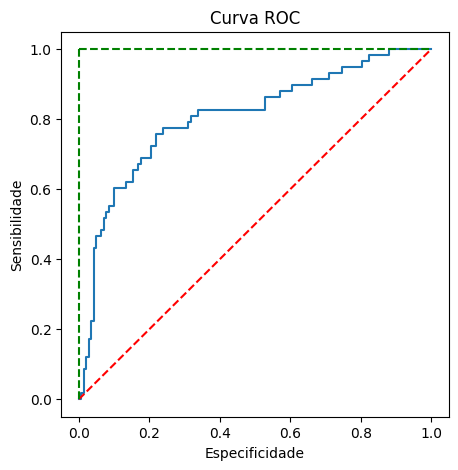

In [105]:
model = roda_modelo(
    x_train, x_test, y_train, y_test,
    LogisticRegression(max_iter=5000))

In [106]:
data

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,est_civil
0,0,0,1,0,0,1,0,0,4,0,...,0,5,0,0,2,0,1,0,0,1
1,1,1,4,1,0,5,1,1,2,1,...,0,1,0,0,1,0,1,1,0,0
2,0,2,1,0,1,2,1,2,2,0,...,0,3,0,0,1,1,2,1,0,1
3,0,0,4,1,2,7,1,2,2,0,...,1,3,0,1,1,0,2,1,0,1
4,1,0,2,2,3,4,1,1,3,0,...,2,4,0,1,2,0,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,2,1,1,2,1,1,2,3,1,...,0,2,0,0,1,1,1,1,0,0
996,0,0,4,1,4,3,1,1,4,2,...,1,2,0,0,1,2,1,0,0,0
997,0,2,1,1,0,0,1,0,4,0,...,3,2,0,0,1,0,1,1,0,1
998,1,0,4,1,0,1,1,1,4,0,...,2,1,0,1,1,0,1,0,0,1
